In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz
import matplotlib.gridspec as gridspec

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

# Othogonal matrices

In [2]:
# 직교행렬 예시

Q1 = np.array([[1,-1], [1,1]]) / np.sqrt(2)
Q2 = np.array([[1,2,2],[2,1,-2], [-2,2,-1]])/3

print(np.round(Q1.T @ Q1, 8)), print('   ')
print(np.round(Q2.T @ Q2, 8))

# 결과 해석 - 직교행렬은 자기 자신과 변환행렬을 곱하면 단위행렬이 된다.

[[1. 0.]
 [0. 1.]]
   
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# QR decomposition

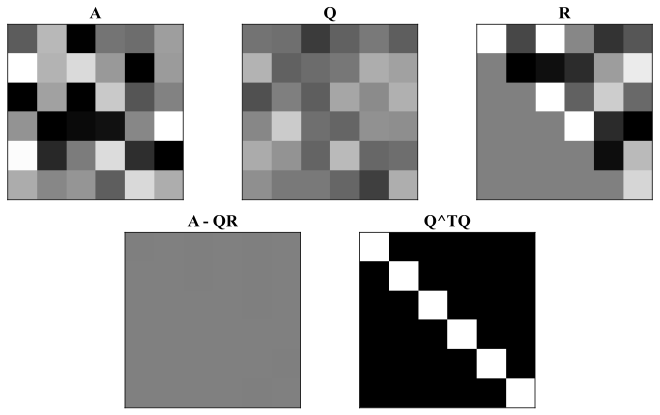

In [11]:
A = np.random.randn(6,6)

Q, R = np.linalg.qr(A)

# show the matrices
fig = plt.figure(figsize=(10,6))
axs = [0]*5
c = 1.5 #color limits

gs1 = gridspec.GridSpec(2,6)
axs[0] = plt.subplot(gs1[0, :2])
axs[0].imshow(A, vmin=-c, vmax=c, cmap='gray')
axs[0].set_title('A', fontweight='bold')

axs[1] = plt.subplot(gs1[0,2:4])
axs[1].imshow(Q, vmin=-c, vmax=c, cmap='gray')
axs[1].set_title('Q', fontweight='bold')

axs[2] = plt.subplot(gs1[0, 4:6])
axs[2].imshow(R, vmin=-c, vmax=c, cmap='gray')
axs[2].set_title('R', fontweight='bold')

axs[3] = plt.subplot(gs1[1, 1:3])
axs[3].imshow(A-Q@R, vmin=-c, vmax=c, cmap='gray')
axs[3].set_title('A - QR', fontweight='bold')

axs[4] = plt.subplot(gs1[1, 3:5])
axs[4].imshow(Q.T@Q, cmap='gray')
axs[4].set_title('Q^TQ', fontweight='bold')

# remove ticks from all axes
for a in axs:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.savefig('Figure_08_01.png', dpi=600)
plt.show()


In [12]:
M = 4
N = 14

A = np.random.randn(M, N) #Q@R
Q, R = np.linalg.qr(A)

print(f'Size of A (M,N): {A.shape}')
print(f'Size of Q (M,N): {Q.shape}')
print(f'Size of R (M,N): {R.shape}')

Size of A (M,N): (4, 14)
Size of Q (M,N): (4, 4)
Size of R (M,N): (4, 14)


In [14]:
A = np.array([[1,-1]]).T #(2,1)

Q,R = np.linalg.qr(A, 'complete') 
#Q는 정사각형 직교행렬(2*2) -> A는 (2,1)이지만 직교성 유지를 위해 자동으로 채워짐
#complete : 전체(완전) , reduced : 경제형(축소)

print(A)
print('\n')
print(Q)
print('\n')
print(R) #상삼각
print('\n')
print(Q*np.sqrt(2)) # 정수 값을 얻기 위해 sqrt(2)로 크기 조정(Q의 원소들은 **단위벡터(길이 1)**로 되어 있어서 루트 값이 포함되어 있을 수 있음)

[[ 1]
 [-1]]


[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


[[-1.41421356]
 [ 0.        ]]


[[-1.  1.]
 [ 1.  1.]]


## Exercise 1

In [16]:
Q = np.linalg.qr(np.random.randn(5,5))[0]
Qt = Q.T
Qi = np.linalg.inv(Q)

#QtQ
print(np.round(Qt@Q,8)) , print('  ')

#QQt
print(np.round(Q@Qt,8)) , print('  ')

#Q^-1Q
print(np.round(Qi@Q,8)) , print('  ')

#QQ^-1
print(np.round(Q@Qi,8)) , print('  ')

#결과 -> 모두 단위 행렬

[[ 1.  0.  0. -0. -0.]
 [ 0.  1.  0. -0. -0.]
 [ 0.  0.  1. -0. -0.]
 [-0. -0. -0.  1. -0.]
 [-0. -0. -0. -0.  1.]]
  
[[ 1. -0. -0. -0.  0.]
 [-0.  1.  0. -0. -0.]
 [-0.  0.  1.  0. -0.]
 [-0. -0.  0.  1. -0.]
 [ 0. -0. -0. -0.  1.]]
  
[[ 1.  0. -0.  0. -0.]
 [ 0.  1. -0. -0. -0.]
 [ 0. -0.  1.  0.  0.]
 [-0. -0. -0.  1. -0.]
 [-0. -0. -0.  0.  1.]]
  
[[ 1. -0.  0.  0. -0.]
 [ 0.  1.  0.  0. -0.]
 [ 0. -0.  1. -0. -0.]
 [-0.  0.  0.  1. -0.]
 [ 0.  0. -0.  0.  1.]]
  


(None, None)

## Exercise 2

In [18]:
m=4
n=4
A=np.random.randn(m,n)

Q = np.zeros((m,n))

# 그람-슈미트 
for i in range(n):

    #initialize
    Q[:,i] = A[:,i]

    #orthogonalize
    a=A[:,i]
    for j in range(i):
        q = Q[:, j]
        Q[:, i] = Q[:, i]-(np.dot(a,q)/np.dot(q,q))*q #정사영(겹치는 부분)을 제거하여 직교화
        ## 상세
        # 1. np.dot(a,q) : a와 q 사이의 내적 = 얼마나 겹치는가 (스칼라값)
        # 2. np.dot(q,q) : q의 길이의 제곱 (스칼라값)
        # 3. np.dot(a, q) / np.dot(q, q) : a가 q 방향으로 얼마나 겹치는지의 "비율"
        # 4. (그 비율) * q : q 방향으로 그만큼 간 벡터 → 즉 a의 q 위 정사영
    
    #normalize
    Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])

Q2,R = np.linalg.qr(A) #위에서 구한 Q(직접 구현)과 결과 동일

print(np.round(Q-Q2, 10)), print('  ')
print(np.round(Q+Q2, 10))

[[ 0.  0. -0.  0.]
 [ 0. -0.  0. -0.]
 [-0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
  
[[-0.38435799  1.81043176 -0.44446577 -0.61404882]
 [-1.89579404 -0.4007128  -0.39879223  0.29386897]
 [ 0.4409229  -0.47630247 -1.86233988 -0.33228472]
 [ 0.25262799  0.57870722 -0.41845564  1.85099215]]


## Exercise 3

In [35]:
U = np.linalg.qr(np.random.randn(6,6))[0] #U는 이미 정규 직교 행렬(QR 중 Q만 가져왔음) #Q와 구분하기 위해 U라고 변수명 지정

q,r = np.linalg.qr(U) #이미 직교인 U를 다시 QR 분해 -> q == U, r == 단위 행렬(I)

print(U), print('   ')

print(f'R after first QR decom : \n', np.round(r,3)), print('   ') # 결과 - R은 단위 행렬(U==q 이므로)

for i in range(U.shape[0]):
    U[:,i] = U[:,i]*(10+i) #U에 정규성을 해치기 위해 각 열벡터에 (10+i)를 곱함

U[0,3] = 0 # 특정 원소 하나만 변경 -> 직교성도 깨질 수 있음

q,r = np.linalg.qr(U) # 새로 QR 분해

print(f'R after second QR decom : \n', np.round(r,3)), print('  ') # 결과 - R은 상삼각 행렬

print(np.round(q.T@q, 4))

[[-0.11282713  0.44020051  0.57369561  0.57468293  0.36619922  0.00213508]
 [-0.03888209 -0.1963112   0.23613172  0.23771682 -0.52339659  0.75745536]
 [-0.320748   -0.32231081 -0.50267657  0.70920097 -0.035727   -0.19055259]
 [-0.31171808  0.43657295 -0.50283739 -0.13206329  0.37095209  0.55167408]
 [ 0.83428842  0.31000369 -0.3212394   0.30378509 -0.08946261  0.06615787]
 [ 0.29945554 -0.61408708  0.07994516  0.02319758  0.6671347   0.28500065]]
   
R after first QR decom : 
 [[ 1.  0.  0.  0.  0. -0.]
 [ 0.  1.  0. -0. -0.  0.]
 [ 0.  0.  1. -0.  0. -0.]
 [ 0.  0.  0.  1.  0. -0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]
   
R after second QR decom : 
 [[ 1.0000e+01  0.0000e+00  0.0000e+00  8.4300e-01  0.0000e+00 -0.0000e+00]
 [ 0.0000e+00  1.1000e+01  0.0000e+00 -3.2890e+00 -0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  1.2000e+01 -4.2860e+00  0.0000e+00 -0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  9.1260e+00 -4.1970e+00 -2.6000e-02]
 [ 0.0000e+00  0.0000e+

## Exercise 4

In [37]:
# a function to compute the inverse
def oldSchoolInv(A):

  # matrix size
  m = A.shape[0]


  # abort if non-square
  if not np.diff(A.shape)[0]==0:
    raise Exception('Matrix must be square.')
  
  # abort if singular
  if np.linalg.matrix_rank(A)<m:
    raise Exception('Matrix must be full-rank.')


  # initialize
  M = np.zeros((m,m)) # minors matrix
  G = np.zeros((m,m)) # grid matrix

  # compute minors matrix
  for i in range(m):
    for j in range(m):
      
      # select rows and cols
      rows = [True]*m
      rows[i] = False
      
      cols = [True]*m
      cols[j] = False
      
      # compute the minors
      M[i,j]=np.linalg.det(A[rows,:][:,cols])
      
      # compute Grid
      G[i,j] = (-1)**(i+j)

          
  # compute cofactors matrix
  C = M * G

  # compute adjugate matrix
  return C.T / np.linalg.det(A)

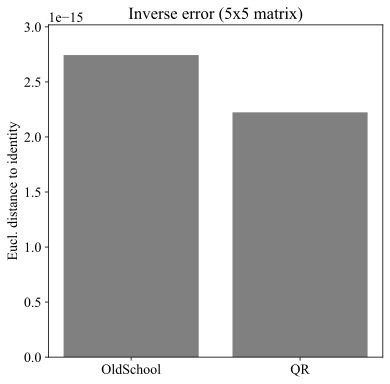

In [43]:
n=5
A=np.random.randn(n,n)

Ainv_old = oldSchoolInv(A)
AAi_old = Ainv_old@A

Q,R = np.linalg.qr(A)
Ainv_qr = oldSchoolInv(R)@Q.T #A의 역행렬 = R역행렬 @ Q역행렬(=Q^T)
AAi_qr = Ainv_qr@A

trueI = np.eye(n)
sse = [0,0] #sse=sum of squared erros (오차의 제곱의 합)
sse[0] = np.sqrt(np.sum((AAi_old-trueI)**2))
sse[1] = np.sqrt(np.sum((AAi_qr-trueI)**2))

plt.figure(figsize=(6,6))
plt.bar(range(2), sse, color=[.5,.5,.5])
plt.xticks(range(2), labels=['OldSchool', 'QR'])
plt.ylim([0, np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)', ha='center')
plt.savefig('Figure_08_02.png', dpi=600)
plt.show()

## Exercise 5

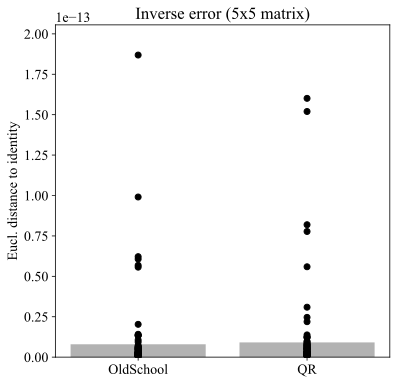

In [44]:
n=5

numExprs=100

sse = np.zeros((numExprs, 2))

for expi in range(numExprs):
    A = np.random.randn(n,n)

    Ainv_old = oldSchoolInv(A)
    AAi_old = Ainv_old@A

    Q, R = np.linalg.qr(A)
    Ainv_qr = oldSchoolInv(R)@Q.T
    AAi_qr = Ainv_qr@A

    trueI = np.eye(n)
    sse[expi,0]=np.sqrt(np.sum((AAi_old - trueI)**2))
    sse[expi,1]=np.sqrt(np.sum((AAi_qr-trueI)**2))

plt.figure(figsize=(6,6))
plt.plot(np.zeros(numExprs), sse[:,0], 'ko')
plt.plot(np.ones(numExprs), sse[:,1], 'ko')
plt.bar(range(2), np.mean(sse, axis=0), color=[.7, .7, .7])

plt.xticks(range(2), labels=['OldSchool', 'QR'])
plt.ylim([0, np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)', ha='center')
plt.savefig('Figure_08_03.png', dpi=600)
plt.show()

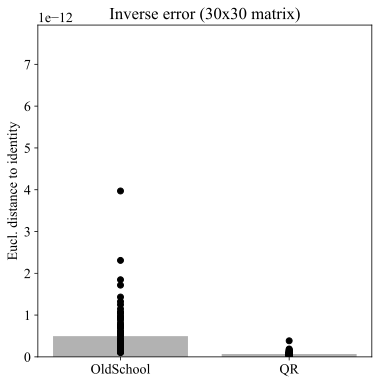

In [51]:
n=30

numExprs=100

sse = np.zeros((numExprs, 2))

for expi in range(numExprs):
    A = np.random.randn(n,n)

    Ainv_old = oldSchoolInv(A)
    AAi_old = Ainv_old@A

    Q, R = np.linalg.qr(A)
    Ainv_qr = oldSchoolInv(R)@Q.T
    AAi_qr = Ainv_qr@A

    trueI = np.eye(n)
    sse[expi,0]=np.sqrt(np.sum((AAi_old - trueI)**2))
    sse[expi,1]=np.sqrt(np.sum((AAi_qr-trueI)**2))

plt.figure(figsize=(6,6))
plt.plot(np.zeros(numExprs), sse[:,0], 'ko')
plt.plot(np.ones(numExprs), sse[:,1], 'ko')
plt.bar(range(2), np.mean(sse, axis=0), color=[.7, .7, .7])

plt.xticks(range(2), labels=['OldSchool', 'QR'])
plt.ylim([0, np.max(sse)*2])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)', ha='center')
plt.savefig('Figure_08_03.png', dpi=600)
plt.show()

## Exercise 6

In [52]:
n=13

Q,R = np.linalg.qr(np.random.randn(n,n))

print(np.linalg.norm(Q,2), #2-노름 = Q의 최대 singular value → 직교 행렬이면 항상 1
      np.sqrt(np.sum(Q**2)) / np.sqrt(n)) #프로베니우스 노름 : 모든 행렬의 원소의 제곱합의 제곱근 -> 직교행렬이므로 각 열벡터가 길이 1 -> n^1/2 로 나누기(평균 길이 계산)

1.0000000000000007 1.0


In [53]:
v = np.random.randn(n,1)

norm_v = np.linalg.norm(v)
norm_Qv = np.linalg.norm(Q@v) # Q는 직교행렬이므로 벡터의 길이를 보존하기 때문에 곱한 값도 원래값과 비슷

print(norm_v)
print(norm_Qv)

3.77986536242595
3.77986536242595


## Exercise 7

In [54]:
A = np.random.randn(10,4)

_,R = np.linalg.qr(A, 'complete')

np.round(R,3)

array([[-3.431, -0.449, -0.564, -4.234],
       [ 0.   ,  3.548, -0.161, -0.565],
       [ 0.   ,  0.   ,  3.137, -0.398],
       [ 0.   ,  0.   ,  0.   , -3.656],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ]])

In [55]:
Rsub = R[:4, :] #서브 행렬 추출

Rsub_inv = np.linalg.inv(Rsub)
Rleftinv = np.linalg.pinv(R) #의사역행렬(왼쪽 역행렬) => R은 정사각형이 아니므로 일반 역행렬은 없음

print('Full inverse of R submatrix : ')
print(np.round(Rsub_inv, 3)), print(f'\n\n')

print('Left inverse of R : ')
print(np.round(Rleftinv,3))

Full inverse of R submatrix : 
[[-0.291 -0.037 -0.054  0.349]
 [ 0.     0.282  0.014 -0.045]
 [ 0.     0.     0.319 -0.035]
 [-0.    -0.    -0.    -0.274]]



Left inverse of R : 
[[-0.291 -0.037 -0.054  0.349  0.     0.     0.     0.     0.     0.   ]
 [-0.     0.282  0.014 -0.045  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.     0.319 -0.035  0.     0.     0.     0.     0.     0.   ]
 [-0.     0.     0.    -0.274  0.     0.     0.     0.     0.     0.   ]]
